In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show")
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x : "%.3f" % x)
import re

In [24]:
df0 = pd.read_csv("adult_eda.csv") # adult = yetişkin
df = df0.copy()

###### 1-Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features? 

In [25]:
df.head()
# us vatandaşları
# workclass         özel, kamu vb.
#fnlwgt             şirket tarafından verilen numara
#marital-status     evlilik durumları
#occopation         meşguliyetleri, iş dalının ne olduğunu veriyor
#race               ırkları
#sex                cinsiyetleri
#capital-gain       ekstra kazancı
#capital-loss       ekstra kaybı
#hours-per-week     haftalık çalışma saati
#native-country     herkes US de yaşıyor, kökenini veriyor.
#salary             50k dan yüksek ve düşük maaşları veriyor.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
df.shape

(32561, 15)

In [27]:
df.info() # null olmayan verileri verir. describe na baktığımızda daha net anlaşılır.
#bunu okuduğumuzda  relationship education-num da NaN değerler olduğunu görmüş oluyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [28]:
df.describe().T 
# default u sayısal değerler döndürür. fakat istersek kategorik verileri de çağırabiliriz.
# örneğin "AGE" sütununu incelediğimizde mean 38 quartile çıktılarına baktığımda max ile 3. çeyrek arasında bayağa 
# fark var diğer quartile değerlere göre burada outlier değerler olabilir diye yorumlayabiliriz, kesin diyemeyiz.
#education-num da kategorik
#fnlwgt ne olduğunu bilmioyruz inceleyebiceğimiz bir şey değil

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education-num,31759.000,10.083,2.576,1.000,9.000,10.000,12.000,16.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [29]:
df.isnull().sum()
#null olanların hepsini verir bize sütun sütun
# örneğin relationship education-num da null değerler var.
# 0 değerlerde NaN yok fakat farklı karakterler olabilir.
#object type olanlarda null value lar olabilir. int da direk sayısal değer döndürdüğünden nan olmaz.olsa int olmaz 

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

###### 2-Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [30]:
#bu soru olmasa nasıl anlayacaktık, yeni olduğumuz için yönergeler var, normalde info kısmında object ve int olanlar 
#var object olanlara bakıp farklı karakterler var mı diye bakabiliriz.
#unique lere de bakılabilir, value_count ile de bakabiliriz.(fakat çok fazla column olduğunda bu kullanışlı olmaz,
#bunun yerine select_dtypes istediğimi int sa örneğin sadece onları döndürür  bu cod ile)


In [31]:
df.columns # hangisi numeric olup olmadığını anlayamam bu şekilde

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [32]:
object_col = df.select_dtypes(include = "object").columns 
object_col
# object olan sütunları görmüş olurum bu şekilde, 
#colums ı sonuna eklemediğimde tüm dataframe i getirir.
#bir değişkene atadım ve iterable oldu

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [33]:
for col in object_col :
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna = False))
#NaN value ları görebilmek için value_count u kullandığımızda dropna false yazmalıyız.
#Çünkü DROPNA = NaN LARI DÜŞÜR DEMEK BU YÜZDEN FALSE YAZARAK NaN ları düşürmem,iş oluyoruz görebilmek için.
    print("--"*10)
    #workclass occupation native-country bu column larda ? işareti var. bunlara bakmalıyız

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [34]:
df[df.isin(["?"])].any() # any yi eklemeseydim DF in hepsini döndürürdü

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [35]:
df.workclass.value_counts(dropna = False) #unknown a çevirmemiz gerekiyor.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [36]:
df.workclass.replace("?", "Unknown", inplace = True) # kalıcı olması içn inplace true dememiz gerekiyor.

In [37]:
df.workclass.value_counts(dropna = False) # unknown a dönüştürdük.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [38]:
df.occupation.replace("?", "Unknown", inplace = True)

In [39]:
df.occupation.value_counts(dropna = False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [40]:
df["native-country"].replace("?", "Unknown", inplace = True)

In [41]:
df[df.isin(["?"])].any() # ? işaretlerini Unknown a dönüştürmüş olduk.
# İSİN içinde anlamını taşıyor.

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [42]:
df.isin(["?"]) # DF gelmiş oldu bu şekilde any getirerek daha kolay görebiliriz.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
#df.replace({"?" : " Unknown"}) # bu şekilde de bütün DF e uygulayabiliriz tek tek column ları yapmak zorunda değiliz.

In [46]:
#df.str.replace("?", "Unknown")

###### 3-Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [47]:
df.education.value_counts(dropna = False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [48]:
df["education-num"].value_counts(dropna = False) # sayılar bire bir aynı değil. education-num NaN var örneğin.

9.000     10215
10.000     7098
13.000     5247
14.000     1687
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       631
15.000      559
5.000       503
8.000       424
16.000      405
3.000       330
2.000       161
1.000        50
Name: education-num, dtype: int64

In [49]:
df.groupby("education")["education-num"].value_counts()
#dropna false yazmadığım için sanki hiç bir NaN değer yokmuş
#gibi gösterdi o yüzden önemli yazmamız

education     education-num
10th          6.000              916
11th          7.000             1146
12th          8.000              424
1st-4th       2.000              161
5th-6th       3.000              330
7th-8th       4.000              631
9th           5.000              503
Assoc-acdm    12.000            1044
Assoc-voc     11.000            1343
Bachelors     13.000            5247
Doctorate     16.000             405
HS-grad       9.000            10215
Masters       14.000            1687
Preschool     1.000               50
Prof-school   15.000             559
Some-college  10.000            7098
Name: education-num, dtype: int64

In [50]:
df.groupby("education")["education-num"].value_counts(dropna = False) 

education     education-num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              161
              NaN                  7
5th-6th       3.000              330
              NaN                  3
7th-8th       4.000              631
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5247
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10215
              NaN                286
Masters       14.000            1687
              NaN                 36
Preschool 

In [51]:
df.drop("education-num", axis = 1, inplace = True) # axis = 1 column dan düşür demek

In [52]:
df.isnull().sum() # education-num column ı gittiği için missing value lar gitmiş oldu. relationship kaldı sadece NaN
# ları var. 

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

###### 4- # Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [53]:
# öncelikle missing value ları halletmemiz lazım daha sonrasında outlier lara bakacağız
df.relationship.value_counts(dropna = False)
#bununla ilişkili olan marital-status column ı var bakalım ona da

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [54]:
df["marital-status"].value_counts(dropna = False)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [55]:
df.groupby("relationship")["marital-status"].value_counts(dropna = False)
# NaN value ların nereye denk geldiğini 
#görmek istiyoruz bir yerde öbeklenmiş mi?
# şu an burda nAN value lar görünmüyor atama yapmamız gerekiyor
#TERSTEN YANİ COLUMN LARIN YERİNİ DEĞİŞTİRDİĞİMİZDE NaN lar çıkıyor.


relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [56]:
df.relationship.replace(np.nan, "None", inplace = True)

#df.relationship.fillna("None", inplace = True) ya da hepsini None a da çevirebilirdik.

In [57]:
df.groupby("relationship")["marital-status"].value_counts(dropna = False)# benzerler kategori sayımızı azaltmak
#için Unmarried olarak atayacağız benzer column larımıza

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
None            Never-married             4485
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowed                     15
                Married-AF-spouse            1
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Marrie

In [58]:
#df.relationship.replace([np.nan, "Not-in-family","Other-relative"], "Unmarried") 
#df.relationship.replace({np.nan :"Unmarried" , "Other-relative":"Unmarried", "Not-in-family":"Unmarried"})
# iki türlü de yazılabilir.

In [59]:
df.relationship.replace("None", np.nan, inplace = True) # Yukarda nan ları stringe çevirmiştik şimdi tekrar 
#np.nan a çevirdik.

In [60]:
df.relationship.replace([np.nan,"Not-in-family","Other-relative"], "Unmarried",inplace = True)

In [61]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [62]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

###### 4-# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [63]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
df.corr().T
# burada salary kısmı bağımlı değişken corr bağımsız değişkenleri veriyor.
#salary column ı da sayısal veriye çevirmemiz gerekiyor ki aralarındaki ilişkiye bakalım.
#burada classification var 0 ya da 1 değerini verir yani 50 k nın üstü ya da 50 k nın altı gibi değerleri 
#0 ve 1 olarak değerlendirebiliriz 
#ML KONUSU modelleme için uygun bir data olabildiğince columnları azaltmak önemli  

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000,-0.077,0.078,0.058,0.069
fnlwgt,-0.077,1.000,0.000,-0.010,-0.019
capital-gain,0.078,0.000,1.000,-0.032,0.078
capital-loss,0.058,-0.010,-0.032,1.000,0.054
hours-per-week,0.069,-0.019,0.078,0.054,1.000


In [65]:
df.salary.value_counts(dropna = False) # nan değerleri yok biliyoruz fakat yine de dropna yı yazdık.

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [66]:
df.salary.map({"<=50K" : 0,">50K" : 1 })

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [67]:
df["salary_num"] = df.salary.map({"<=50K" : 0,">50K" : 1 })
df.salary_num.value_counts(dropna = False)

0    24720
1     7841
Name: salary_num, dtype: int64

In [68]:
corr = df.corr()
corr
# salary_num adında column oluşturduk ve bunları 0 ve 1 olarak belirledik 
#bunu da corelasyona dahil etmiş olduk

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary_num
age,1.000,-0.077,0.078,0.058,0.069,0.234
fnlwgt,-0.077,1.000,0.000,-0.010,-0.019,-0.009
capital-gain,0.078,0.000,1.000,-0.032,0.078,0.223
capital-loss,0.058,-0.010,-0.032,1.000,0.054,0.151
hours-per-week,0.069,-0.019,0.078,0.054,1.000,0.230
salary_num,0.234,-0.009,0.223,0.151,0.230,1.000


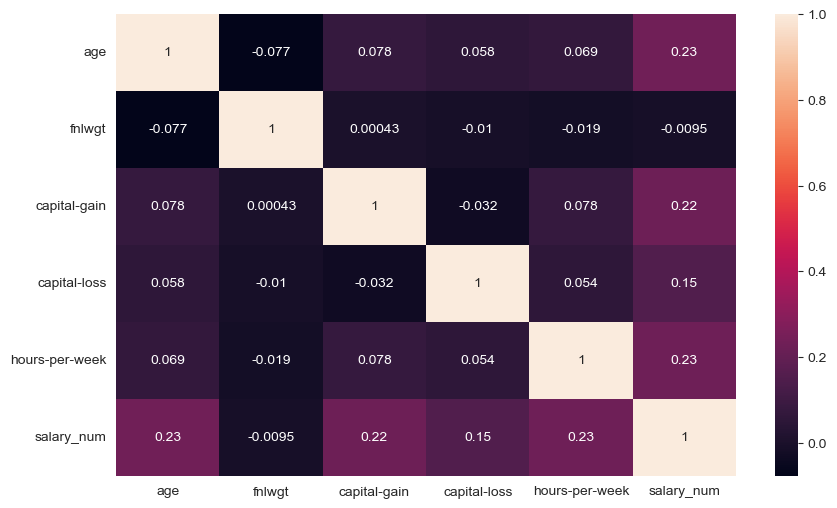

In [69]:
plt.figure(figsize =(10,6))
sns.heatmap(corr, annot = True);

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000
salary_num,32561.000,0.241,0.428,0.000,0.000,0.000,0.000,1.000


## age column column bakmak daha iyi oluyor

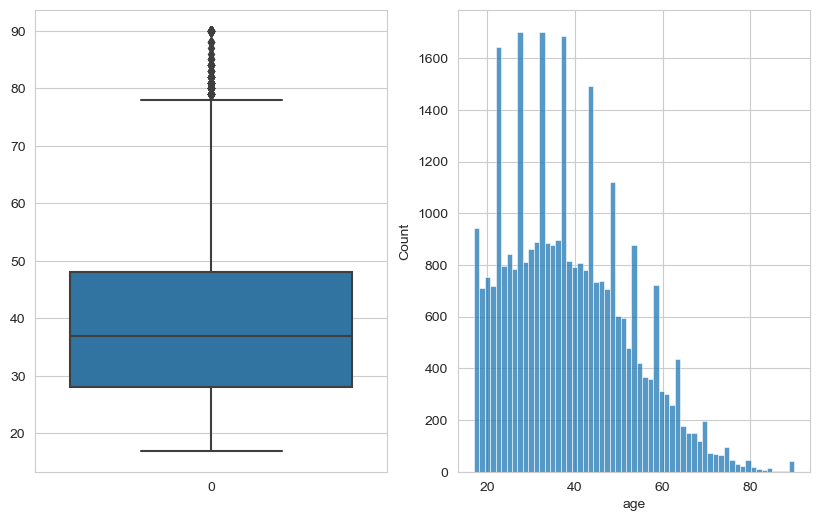

In [71]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(data = df.age)
plt.subplot(1,2,2)
sns.histplot(data = df.age);
#histplot için ; right skiw  sağda olanların outlier olduğunu değerlendirebilirim
#boxplot için de 80-90 arası outlier olarak görünüyor.

In [72]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high-low # BOXPLOT un genişliğini veriyor.
low, high,IQR

(28.0, 48.0, 20.0)

In [73]:
lower_lim = low - (1.5*IQR)
upper_lim = high + (1.5*IQR)
lower_lim, upper_lim

(-2.0, 78.0)

In [74]:
df[df["age"]>78]["age"].value_counts() # dropna eklemiyorzu çünkü NaN değerler yok artık.

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

In [75]:
df[df["age"] > 78].sort_values(by="age", ascending = False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
12451,90,Unknown,225063,Some-college,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,<=50K,0
10545,90,Private,175491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,1
5406,90,Private,51744,Masters,Never-married,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,>50K,1
19747,90,Private,226968,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17609,79,Self-emp-inc,97082,12th,Widowed,Sales,Unmarried,White,Male,18481,0,45,United-States,>50K,1
20483,79,Local-gov,146244,Doctorate,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K,0
18141,79,Self-emp-not-inc,84979,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K,1
19828,79,Private,172220,7th-8th,Widowed,Priv-house-serv,Unmarried,White,Female,2964,0,30,United-States,<=50K,0


## hours-per-week

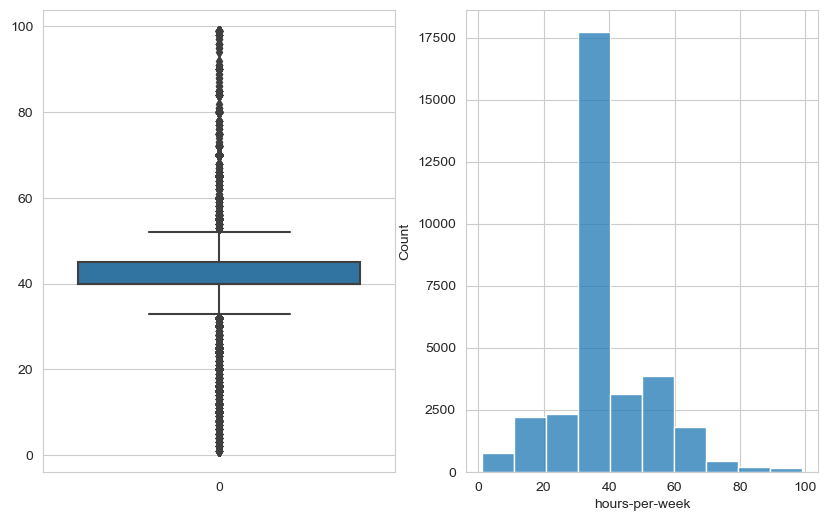

In [76]:
plt.figure(figsize = ( 10,6))
plt.subplot(1,2,1)
sns.boxplot(data = df["hours-per-week"])
plt.subplot(1,2,2)
sns.histplot(data = df["hours-per-week"], bins = 10);
#part time çalışan var mı örneğin ya da full time olanları değerlendirmemizi istiyor şirket bunlar sorulacak şeyler


In [77]:
low = df["hours-per-week"].quantile(0.25)
high = df["hours-per-week"].quantile(0.75)
IQR = high - low
low,high, IQR

(40.0, 45.0, 5.0)

In [78]:
lower_lim = low - (1.5*IQR)
upper_lim = high + (1.5*IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [79]:
df[df["hours-per-week"]>52.5]["hours-per-week"].value_counts()

60    1475
55     694
70     291
65     244
80     133
56      97
99      85
72      71
75      66
84      45
54      41
90      29
58      28
53      25
62      18
66      17
57      17
64      14
85      13
68      12
98      11
63      10
78       8
77       6
59       5
96       5
67       4
91       3
81       3
76       3
88       2
73       2
89       2
97       2
86       2
61       2
95       2
94       1
87       1
82       1
92       1
74       1
Name: hours-per-week, dtype: int64

In [80]:
df[df["hours-per-week"]>52.5]["hours-per-week"].value_counts().sort_index(ascending = False)

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [81]:
df[df["hours-per-week"]>52.5].sort_values(by = "hours-per-week", ascending = False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
25986,44,Local-gov,212665,Some-college,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K,0
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,2907,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23,Private,181820,HS-grad,Separated,Craft-repair,Unmarried,White,Male,0,0,53,United-States,<=50K,0
28858,62,Private,123411,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,United-States,<=50K,0
15889,43,Federal-gov,155106,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,53,United-States,<=50K,0
15908,22,Local-gov,163205,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,53,United-States,<=50K,0


In [82]:
df.groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        41.379
Local-gov          40.983
Never-worked       28.429
Private            40.267
Self-emp-inc       48.818
Self-emp-not-inc   44.422
State-gov          39.032
Unknown            31.919
Without-pay        32.714
Name: hours-per-week, dtype: float64

In [83]:
df[df["hours-per-week"]>52.5].groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        62.000
Local-gov          62.600
Private            62.411
Self-emp-inc       64.164
Self-emp-not-inc   65.823
State-gov          64.053
Unknown            66.292
Without-pay        60.000
Name: hours-per-week, dtype: float64

In [84]:
df[df["hours-per-week"]== 99].groupby("workclass")["hours-per-week"].count()

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
Unknown              5
Name: hours-per-week, dtype: int64

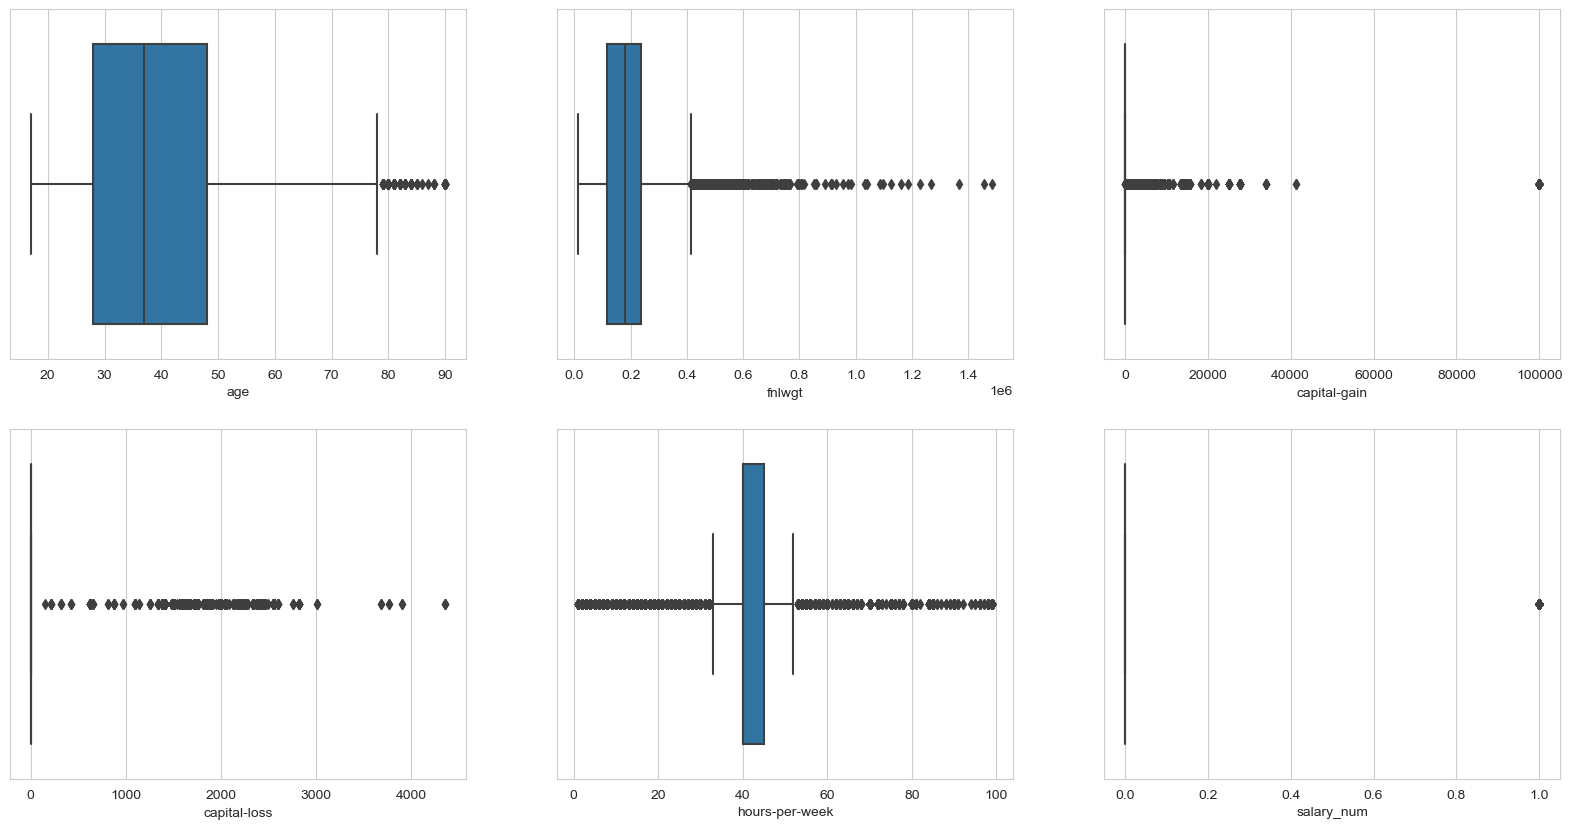

In [85]:
index = 0
plt.figure(figsize = (20,10))
for feature in df.select_dtypes("number").columns : # object değilde number olanları getir dedik.
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x = feature, data=df, whis = 1.5) #whis bıyık genişliği

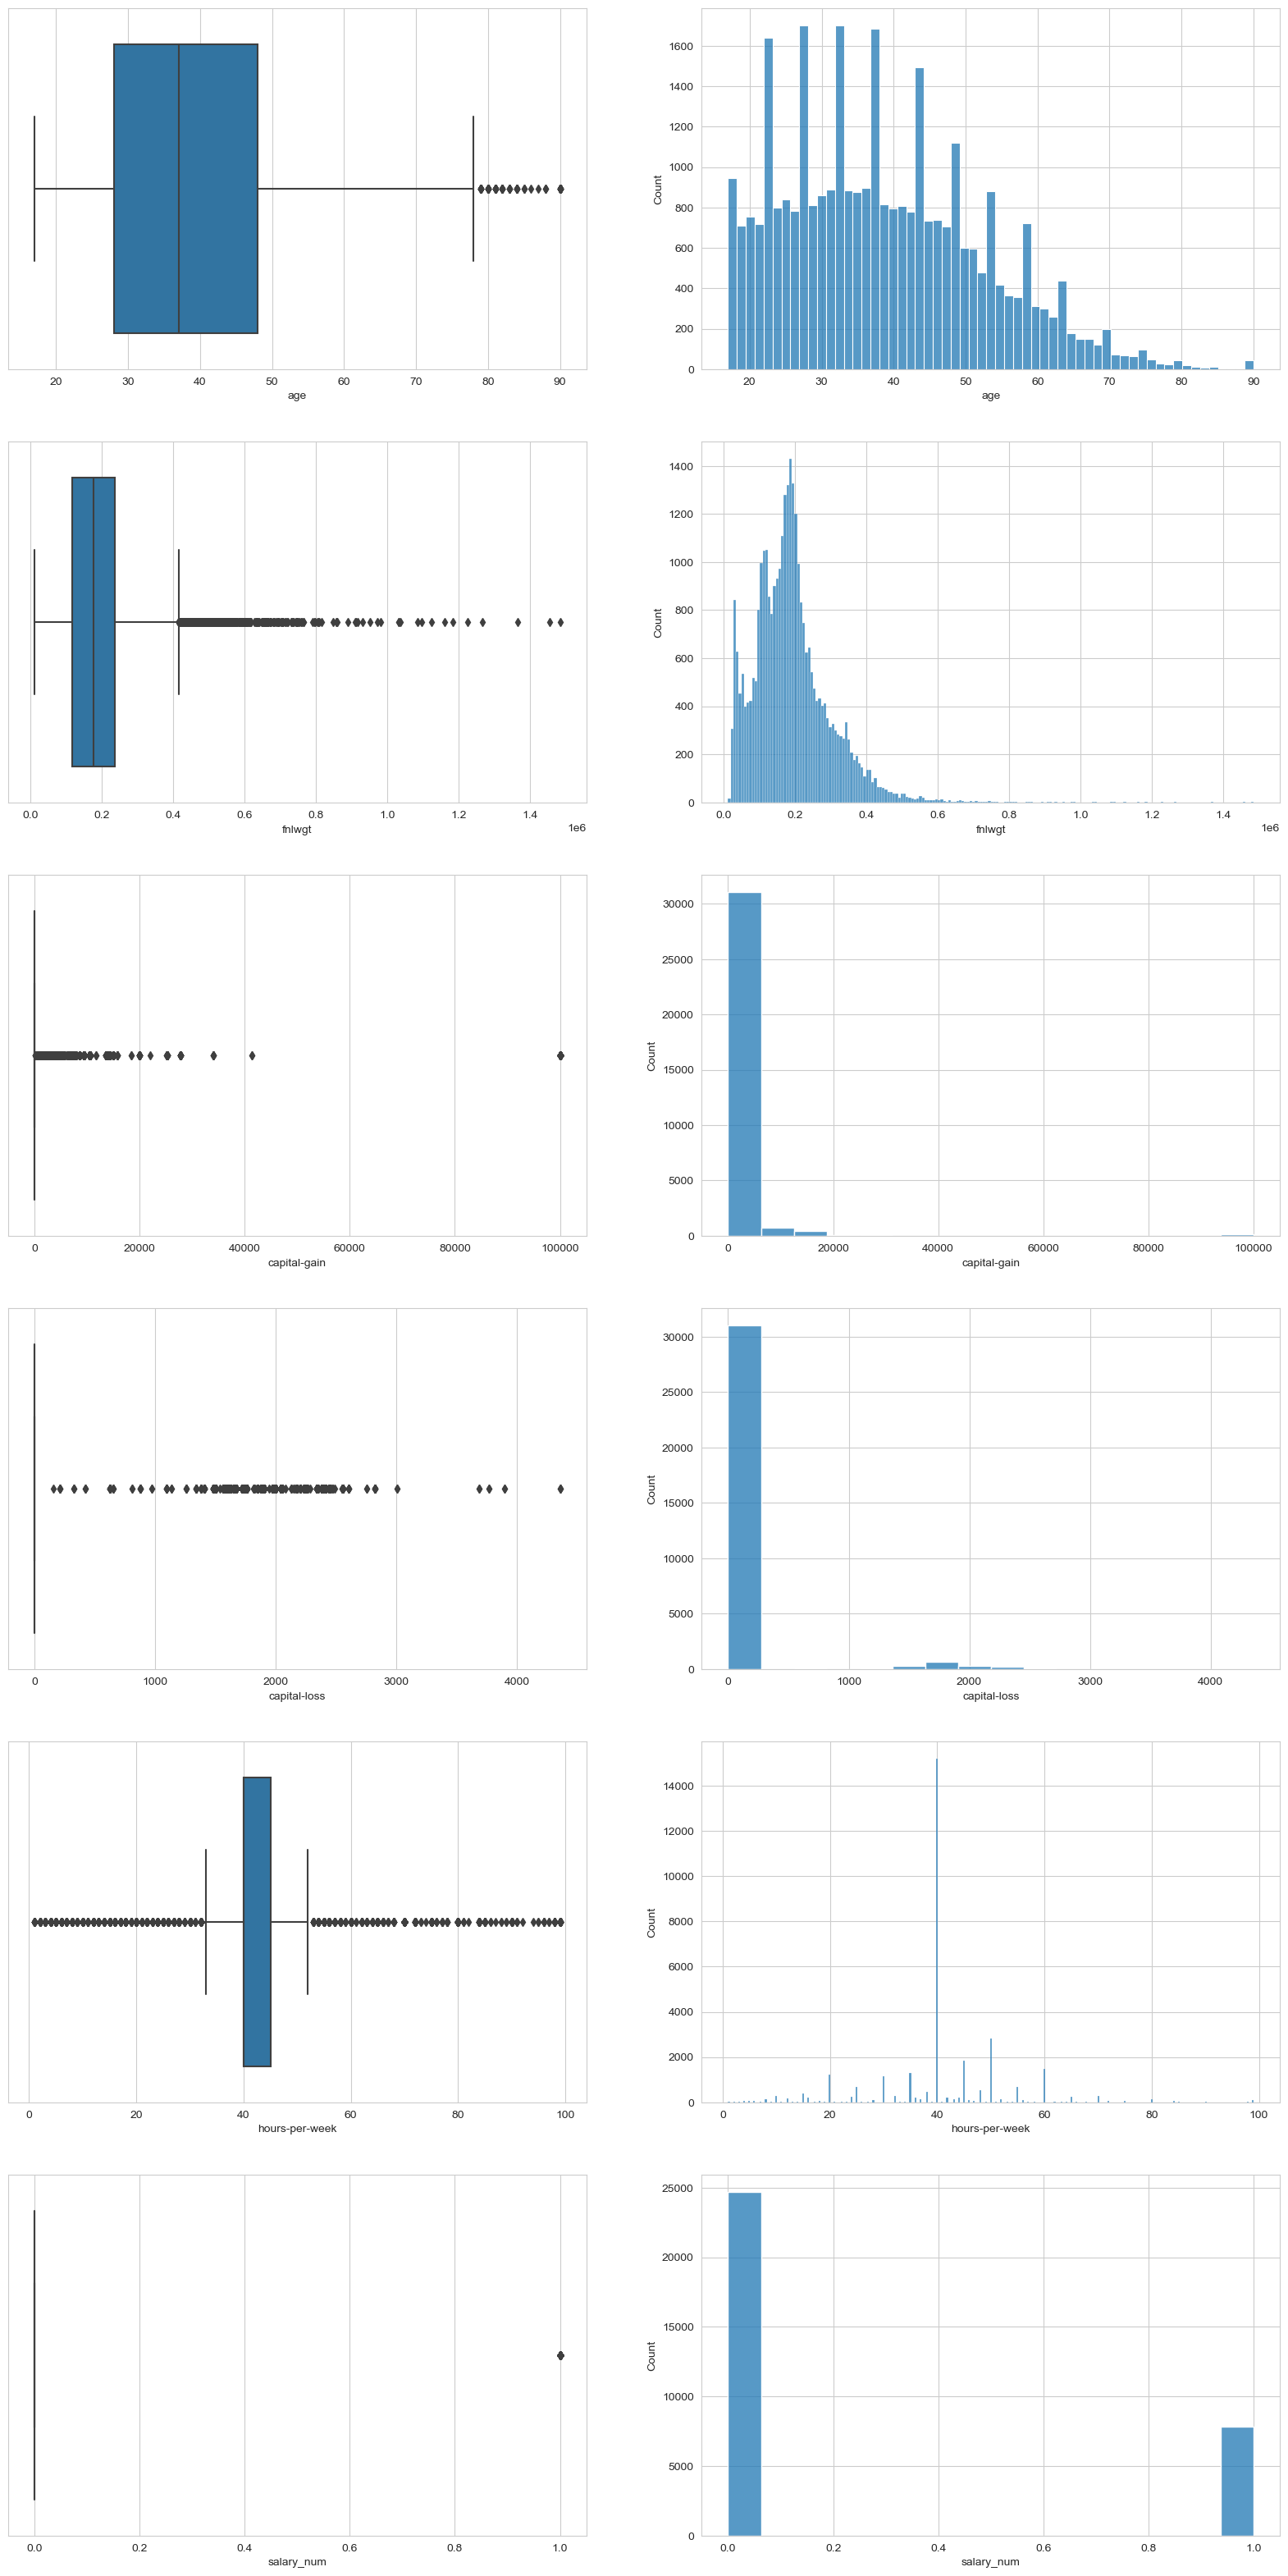

In [86]:
index = 0
plt.figure(figsize = (20,40))
for feature in df.select_dtypes("number").columns :
    
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x = feature, data = df, whis = 1.5)
    
    index += 1
    plt.subplot(6,2, index)
    sns.histplot(x = feature, data = df)

###### 5- After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [87]:
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [88]:
df[(df["age"]>78)&(df["hours-per-week"]>52.5)] #outlier olarak değerlendirdik ve bunları düşeceğiz.

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


In [89]:
drop_index = df[(df["age"]>78)&(df["hours-per-week"]>52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [90]:
df.drop(index = drop_index, inplace = True)

In [91]:
df[(df["age"]>78)&(df["hours-per-week"]>52.5)] # hepsini drop ettik içi boşaldı artık.

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num


######  How many of each race are represented in this dataset?

In [92]:
df.race.value_counts()

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

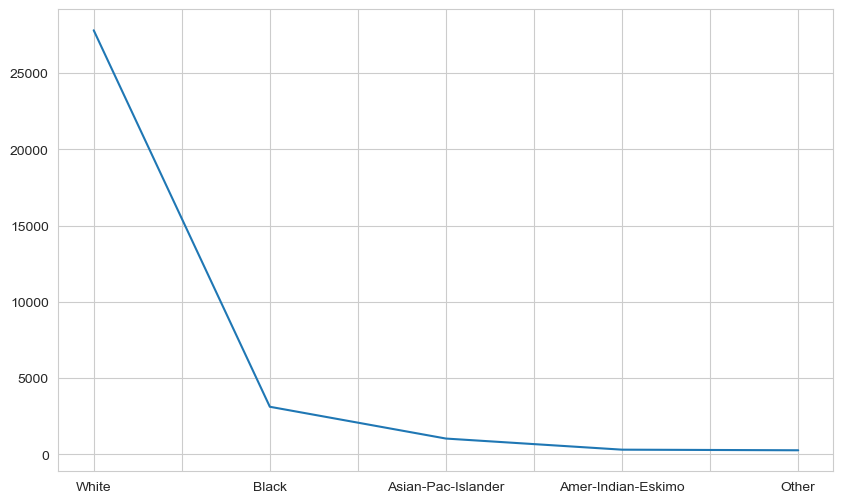

In [93]:
df.race.value_counts().plot(); 
#plot python built in methodu dur.
# direk line plot verir içine bişi yazmazsak.

In [94]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K,0


In [95]:
df.loc[df.sex == "Male", "age"].mean()

39.41444378127726

In [96]:
df.loc[df.race == "White", "hours-per-week"].mean()

40.68133923112885

In [97]:
df.loc[df.race == "Black", "hours-per-week"].mean()

38.42285531370038

In [98]:
df.loc[df.race == "Other", "hours-per-week"].mean()

39.46863468634686

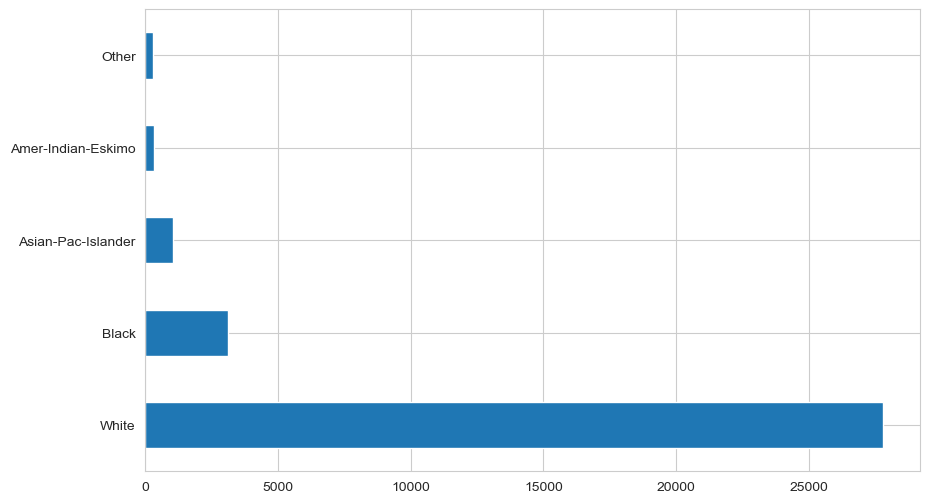

In [99]:
df.race.value_counts().plot.barh(); # default vertical barh diye yazsak horizontal olarak verir.

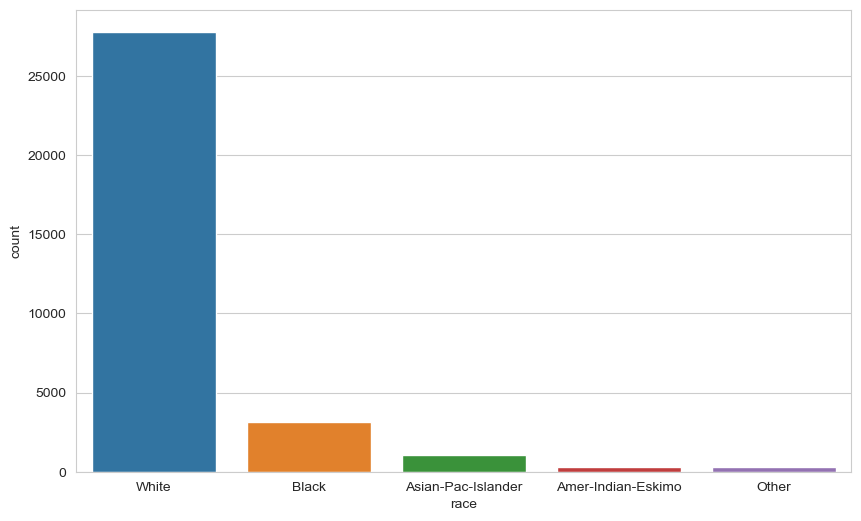

In [100]:
sns.countplot(df.race); #counplot KATEGORİK  verilerde kullanılır.

###### What is the average age of men/women

In [101]:
a = df.loc[df.sex == "Male", "age"].mean()
a

39.41444378127726

In [102]:
df[df.sex == "Male"]["age"].mean() # bu şekilde de yazabiliriz.

39.41444378127726

In [103]:
round(a, 1) # virgülden sonra kaç bas göstermek istiyorsak bunu kullanıyoruz.

39.4

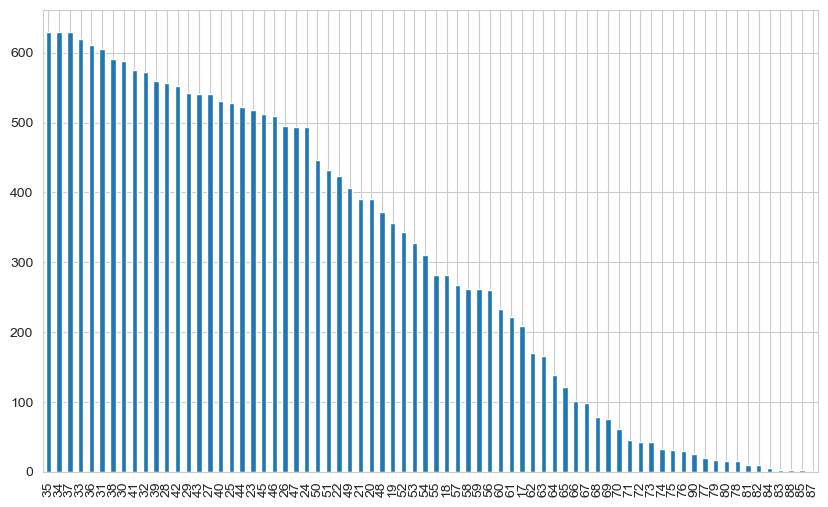

In [104]:
df.loc[df.sex == "Male", "age"].value_counts().plot.bar();

In [105]:
a = df.loc[df.sex == "Female", "age"].mean()
a

36.85823043357163

In [106]:
round(a, 2)

36.86

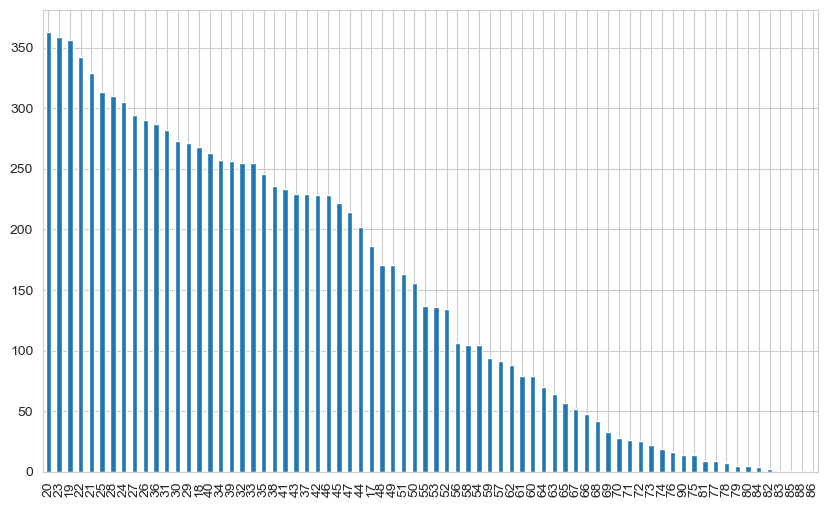

In [107]:
df.loc[df.sex =="Female", "age"].value_counts().plot.bar();

###### What is the percentage of people who have a Bachelor's degree?

In [108]:
df.groupby("education").education.count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [109]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [110]:
df.education.value_counts().loc["Bachelors"]

5353

In [111]:
len(df)

32552

In [112]:
bachelors = df.education.value_counts().loc["Bachelors"]
total = len(df)

In [113]:
bachelors/total*100

16.44445809781273

In [114]:
df.education.value_counts(normalize = True) # sadec bu kodla yukardakileri yazmadan da bulabiliriz.

HS-grad        0.323
Some-college   0.224
Bachelors      0.164
Masters        0.053
Assoc-voc      0.042
11th           0.036
Assoc-acdm     0.033
10th           0.029
7th-8th        0.020
Prof-school    0.018
9th            0.016
12th           0.013
Doctorate      0.013
5th-6th        0.010
1st-4th        0.005
Preschool      0.002
Name: education, dtype: float64

In [116]:
percentage_bachelors = df["education"].value_counts(normalize = True).loc["Bachelors"]*100
round(percentage_bachelors, 1)

16.4

In [119]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors, 1)}")

The percentage of people who have a Bachelor's degree : %16.4


### What percentage of people with advanced education(Bachelors, Masters or Doctorate) make more than 50K?

In [122]:
df.education.isin(["Bachelors", "Masters", "Doctorate"])
#(df.education == "Bachelors") |(df.education == "Masters") |(df.education == "Doctorate")

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [123]:
(df.education == "Bachelors")

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [124]:
df.salary == ">50K"

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 32552, dtype: bool

In [125]:
df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [126]:
len(df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")])

3484

In [129]:
df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")].shape

(3484, 15)

In [130]:
df.shape[0]

32552

In [131]:
high_edu_high_sal = len(df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")])
total = df.shape[0]

In [132]:
perc_high_edu = high_edu_high_sal/total*100
perc_high_edu

10.702875399361023

In [133]:
print(f"percentage of people with advanced education make more than 50K : {round(perc_high_edu, 2)}")

percentage of people with advanced education make more than 50K : 10.7


### What percentage of people without advanced education make more than 50K?

In [135]:
# ~ tilda işareti; dışında olanları getir demek.
df[(~df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K,1
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K,1
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [136]:
low_edu_high_sal = len(df[(~df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary == ">50K")])
total = df.shape[0]


In [137]:
perc_low_edu = low_edu_high_sal/total
perc_low_edu

0.13375522241336937

In [141]:
print(f"percentage of people without advenced education make than 50K : {round(perc_low_edu*100, 1)}")

percentage of people without advenced education make than 50K : 13.4


In [142]:
if perc_high_edu > perc_low_edu :
    print("More education more money")
else :
    print("education has no clear on salary. you should investigate some other features also")

More education more money


What percentage of the people who work the minimu number of hours per week have a salary of >50K

In [147]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary',
       'salary_num'],
      dtype='object')

In [149]:
lazy_riches = (df["hours-per-week"]==df["hours-per-week"].min())&(df.salary == ">50K")
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [151]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1


In [156]:
num_min_workers = len(df[df["hours-per-week"]== df["hours-per-week"].min()])
num_min_workers

20

In [158]:
print(f"percentage >50K : % {round(lazy_riches/num_min_workers*100)}")

percentage >50K : % 0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
         ... 
32556   0.000
32557   0.000
32558   0.000
32559   0.000
32560   0.000
Length: 32552, dtype: float64


What country has the highest percentage of people that earn  >50K

In [163]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [165]:
country_salary_df_riches = df[df.salary == ">50K"].groupby("native-country")[["salary"]].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [169]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values(by="salary", ascending = False)
rich_per_country

,salary
native-country,
Iran,0.419
France,0.414
India,0.400
Taiwan,0.392
Japan,0.387
Yugoslavia,0.375
Cambodia,0.368
Italy,0.342
England,0.333


In [170]:
rich_per_country.loc[rich_per_country.salary == rich_per_country.salary.max()]

,salary
native-country,
Iran,0.419


###  Identify the most popular occupation for those who earn >50K in India

In [171]:
top_IN_occupation = (df["native-country"] == "India")&(df.salary == ">50K")
top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [172]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K,1
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K,1
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K,1
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K,1
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K,1
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,1


In [174]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [176]:
df[top_IN_occupation]["occupation"].mode()[0]

'Prof-specialty'

In [178]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

36.85823043357163 the most popular occupation for those who earn >50K in India.
